## Fetal Immune - Myeloid subset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
import numpy as np 
import pandas as pd
import scanpy as sc
from datetime import datetime
import matplotlib.pyplot as plt

### Load data

In [3]:
adata = sc.read_h5ad("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.wGut.batchCorrected_20210118.MYELOID.batchCorrected.h5ad")

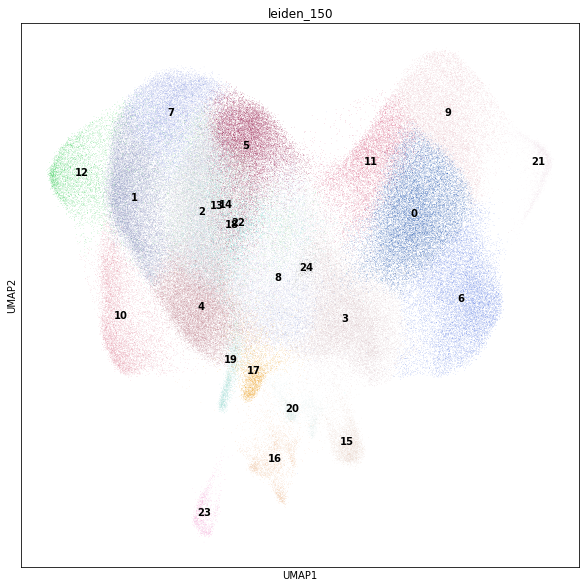

In [5]:
plt.rcParams["figure.figsize"] = [10,10]
sc.pl.umap(adata, color=["leiden_150"], legend_loc="on data")

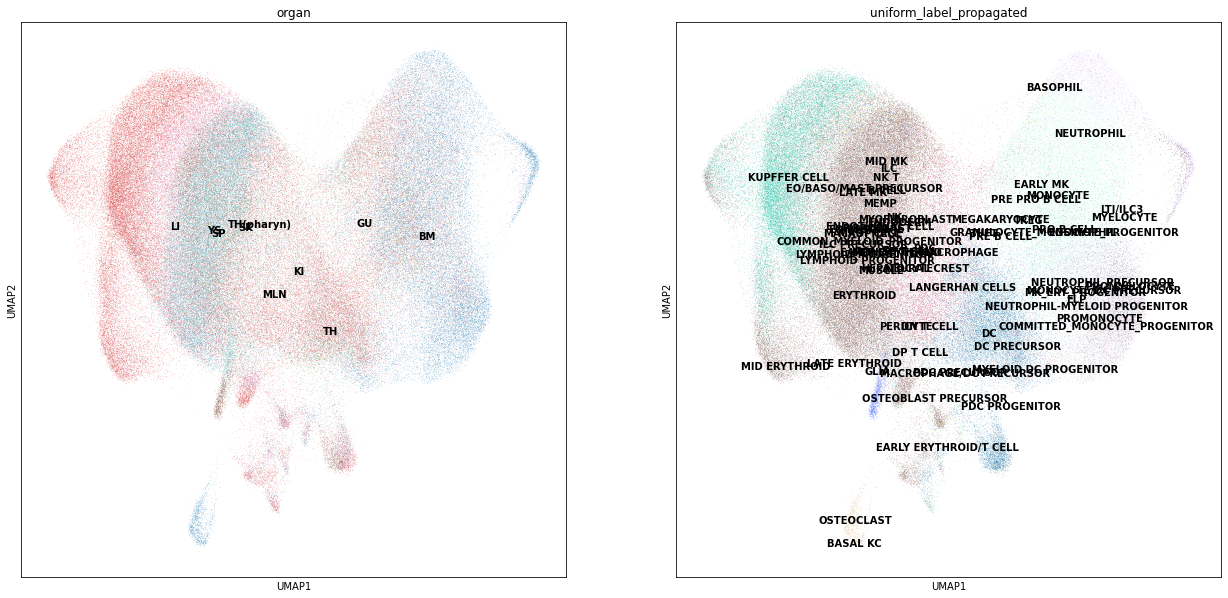

In [7]:
sc.pl.umap(adata, color=["organ", 'uniform_label_propagated'], legend_loc="on data")

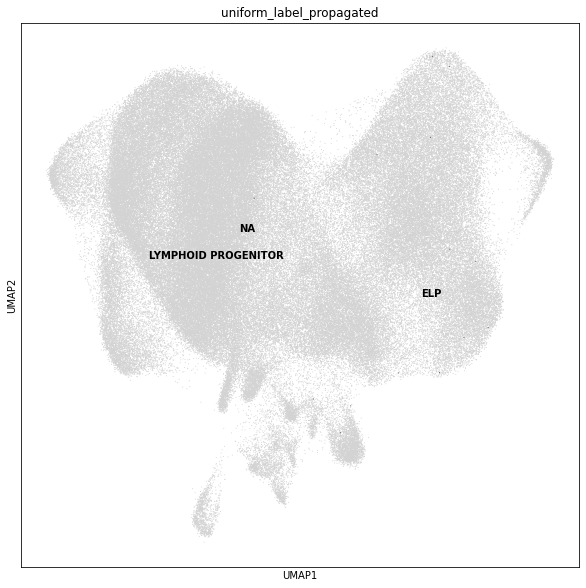

In [8]:
sc.pl.umap(adata, color=['uniform_label_propagated'], legend_loc="on data", 
               groups=["LYMPHOID PROGENITOR", "ELP"], size=4)

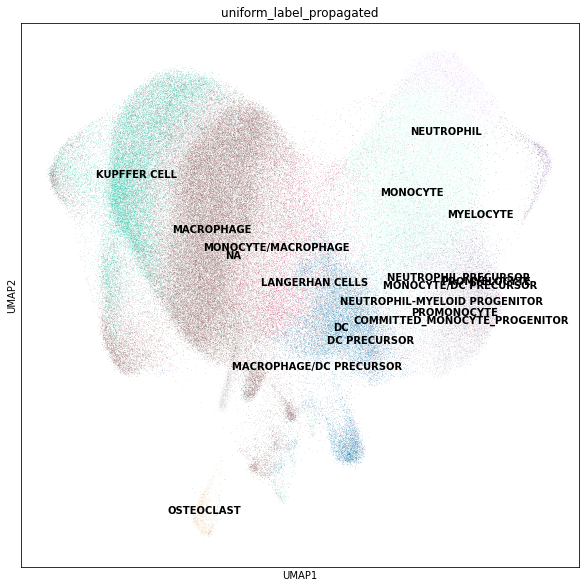

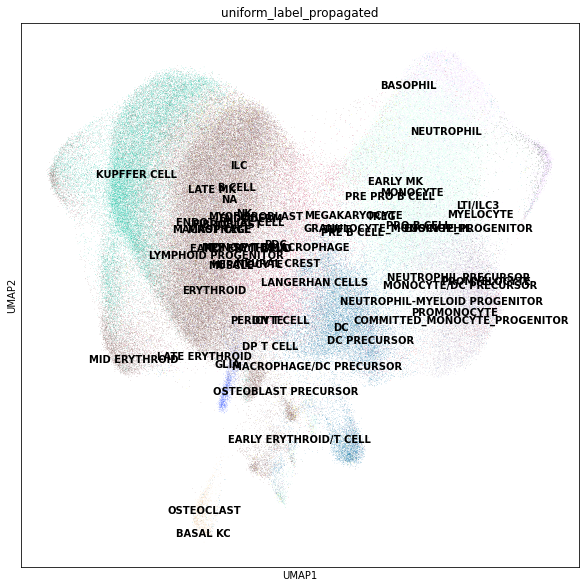

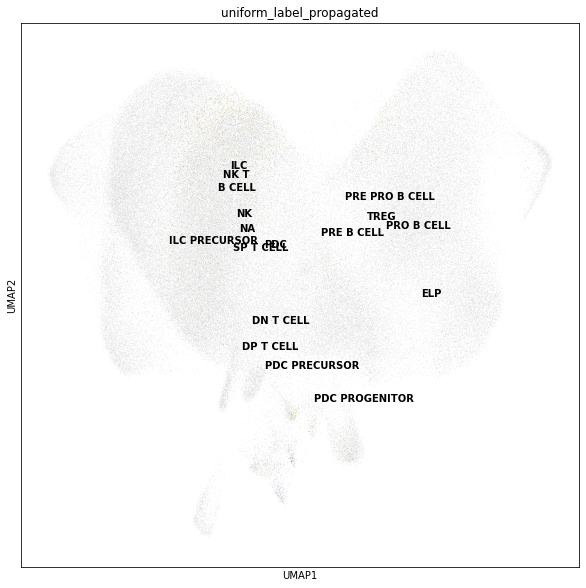

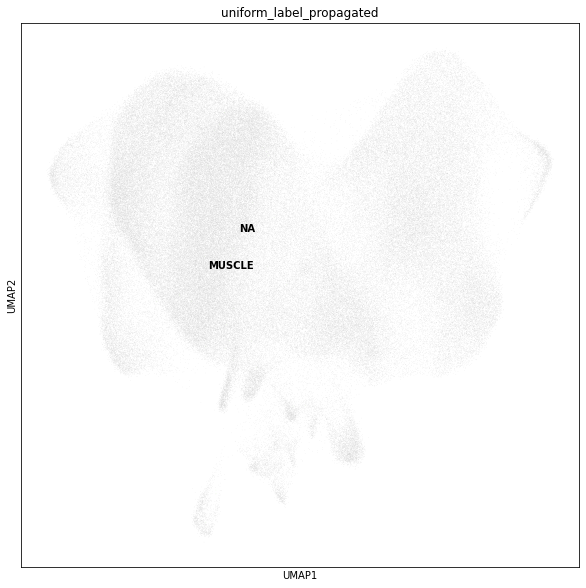

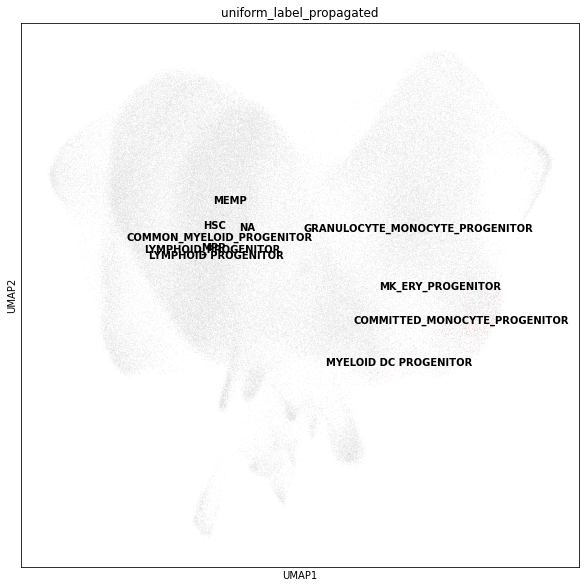

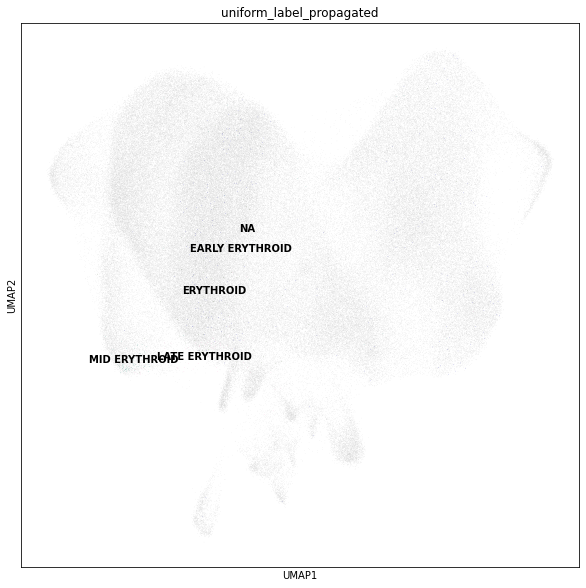

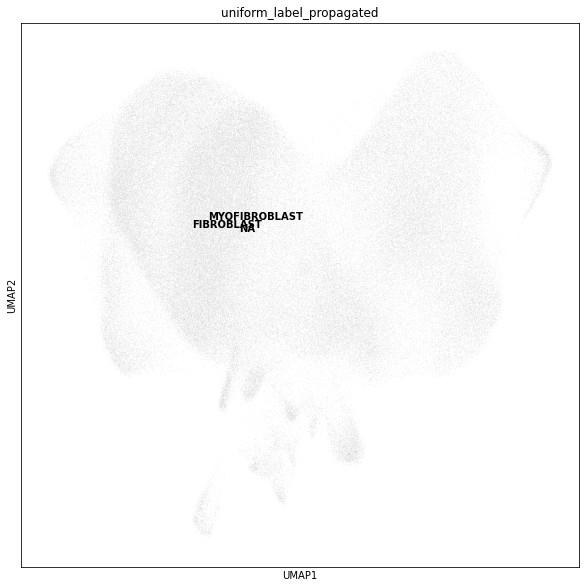

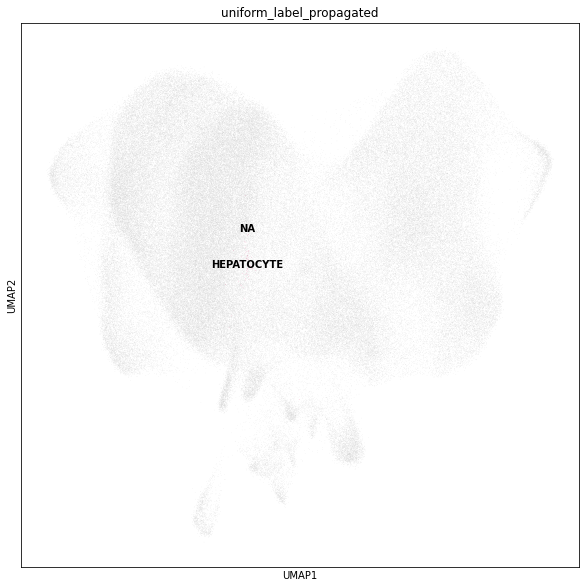

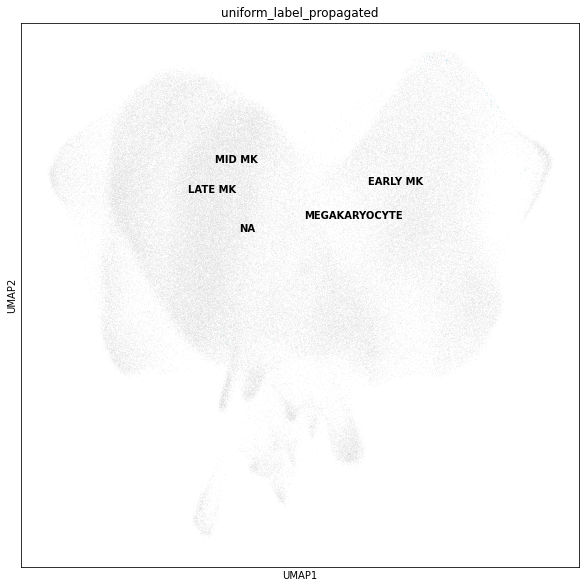

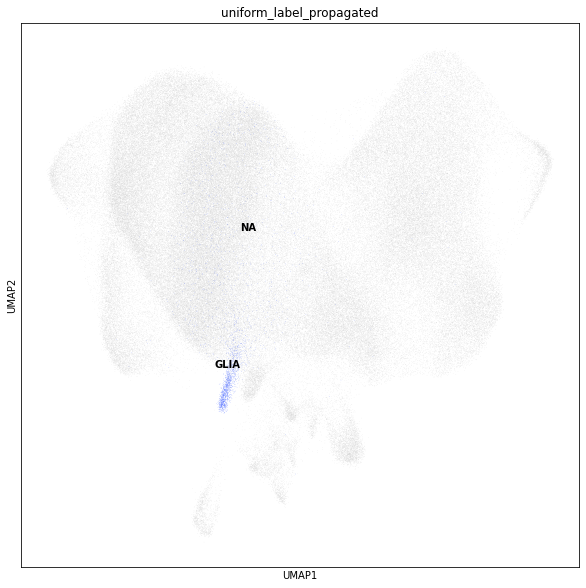

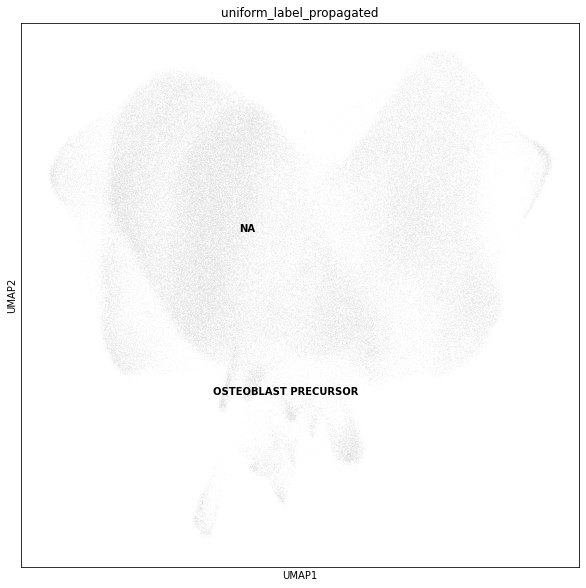

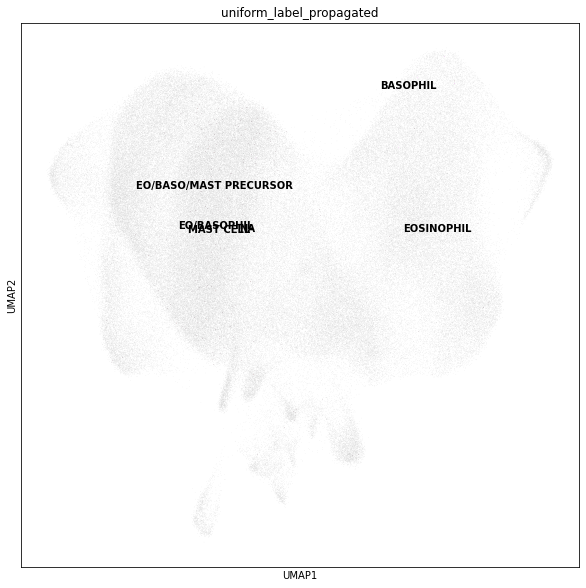

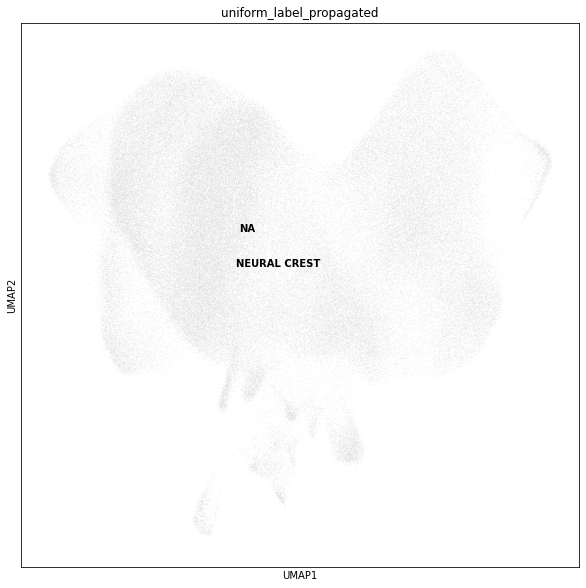

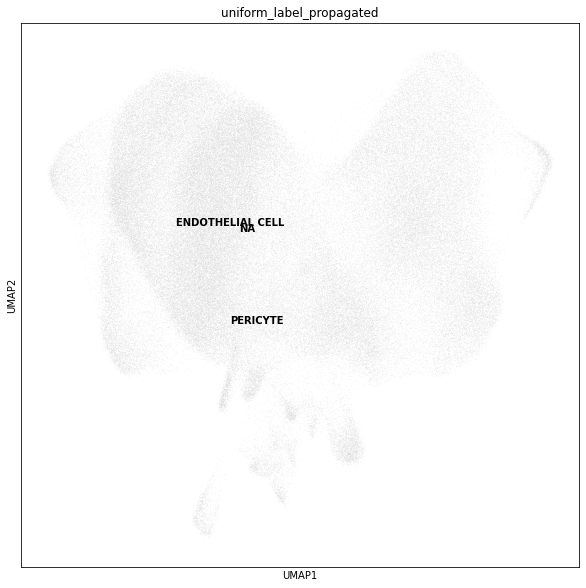

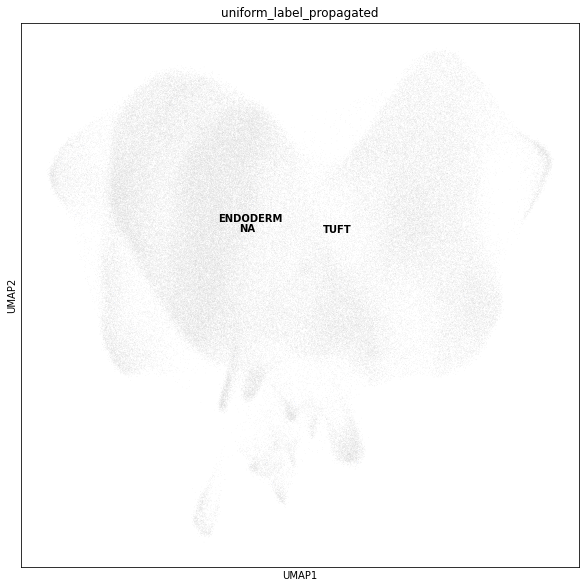

In [9]:
for o in adata.obs['uniform_label_lvl0'].unique():
    sc.pl.umap(adata, color=['uniform_label_propagated'], legend_loc="on data", 
               groups=adata.obs['uniform_label_propagated'][adata.obs['uniform_label_lvl0'] == o].unique())

### Annotate clusters using most frequent label 

In [11]:
## Add predicted lvl0 label based on most frequent cell type
cl_counts = adata.obs.reset_index()[['uniform_label_propagated', 'leiden_150','index']] \
    .dropna() \
    .groupby(['leiden_150', 'uniform_label_propagated']) \
    .count().fillna(0).reset_index() \
    .pivot(columns=['leiden_150'], index=['uniform_label_propagated'])

cl_frac = (cl_counts/cl_counts.sum(0))
cl_frac.columns = ['index_' + str(x[1]) for x in cl_frac.columns]
max_cl = cl_frac.max()
top_3_ls = []
for cl in cl_frac.columns:
    top_3 = cl_frac[cl_frac.index!="nan"].nlargest(1, cl)[cl].index[0]
    top_3_ls.append(top_3)

pred_labels_df = pd.DataFrame(top_3_ls, columns=['leiden_150_pred_label'], index=[int(x.split("index_")[1]) for x in cl_frac.columns])

pred_labels_df.index = pred_labels_df.index.astype('str')
# pred_labels_df.loc[adata.obs['leiden_100']]['leiden_100_pred_label']

adata.obs['leiden_150_pred_label'] = pred_labels_df.loc[adata.obs['leiden_150']]['leiden_150_pred_label'].values

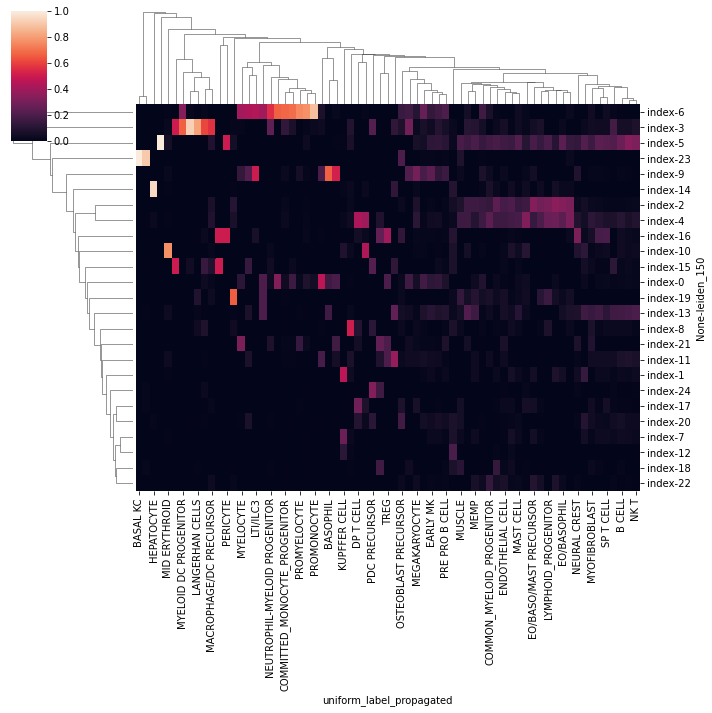

In [12]:
import seaborn as sns
sns.clustermap(cl_counts.T/cl_counts.sum(1))

... storing 'leiden_150_pred_label' as categorical


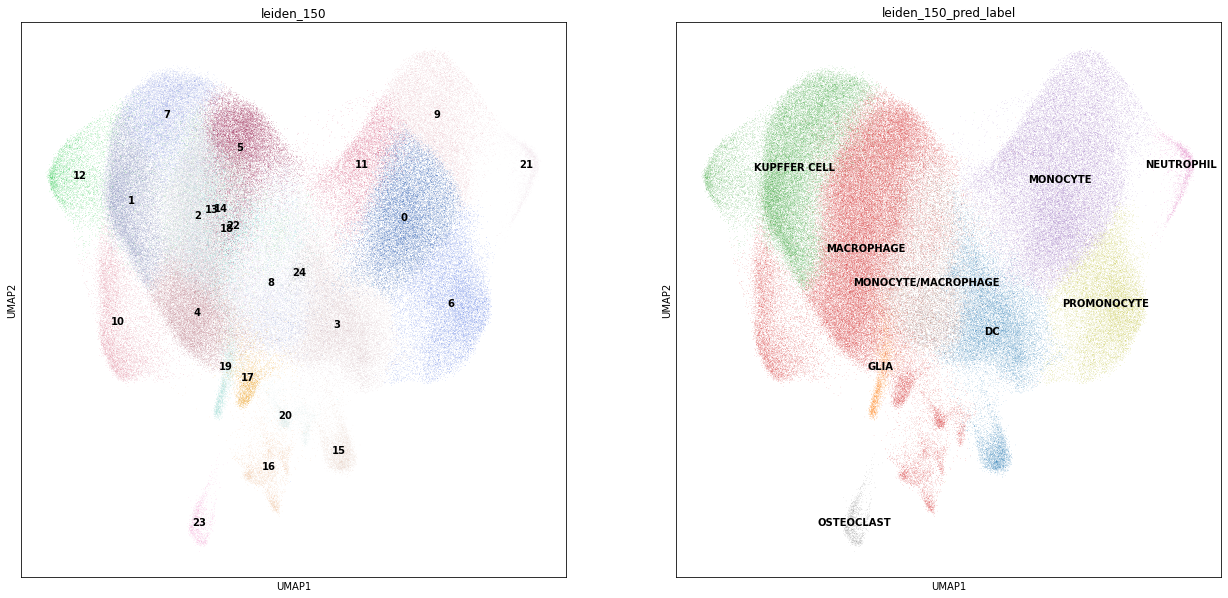

In [13]:
sc.pl.umap(adata, color=["leiden_150", "leiden_150_pred_label"], legend_loc="on data")

### Add cluster from B cell

lymphoid engulfing macrophages

In [14]:
adata_b = sc.read_h5ad("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.wGut.batchCorrected_20210118.B_2MYELOID.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [16]:
adata_raw = sc.read_h5ad("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.wGut.batchCorrected_20210118.MYELOID.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [22]:
adata_b.var_names_make_unique()
adata_raw.var_names_make_unique()

In [24]:
import anndata
anndata.concat([adata_raw, adata_b], axis=0).write_h5ad("/nfs/team205/ed6/data/Fetal_immune/PAN.A01.v01.entire_data_normalised_log.wGut.batchCorrected_20210118.MYELOID_CLEAN.h5ad")

... storing 'Sample' as categorical
... storing 'sort' as categorical
... storing 'file' as categorical
... storing 'bbk' as categorical
... storing 'uniform_label_propagated' as categorical
